<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data_multi_delta_(0_4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.4_n20.csv',
 'data_multi_delta_0.4_n30.csv',
 'data_multi_delta_0.4_n60.csv',
 'data_multi_delta_0.4_n120.csv',
 'data_multi_delta_0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,61.973157,28.960157,63.207238,26.344418,-1.337471,189.147498,190.524515,-1.377017
1,0.0,1.0,90.997366,80.181675,57.999644,30.921770,-1.351888,268.748569,270.512164,-1.763595
2,0.0,2.0,99.901485,32.381101,97.987926,35.312995,-0.166569,275.416938,275.059575,0.357363
3,0.0,3.0,53.181459,55.641488,91.891161,46.875579,3.468377,261.058063,257.073124,3.984939
4,0.0,4.0,34.059145,86.006048,69.392514,91.811976,-3.724882,287.544801,290.611403,-3.066601
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,96.088498,42.593006,73.212408,53.173567,-2.843099,272.224381,276.302239,-4.077859
59996,999.0,56.0,72.468916,48.421973,94.405785,59.621957,-0.689460,284.229172,285.736941,-1.507769
59997,999.0,57.0,59.968864,92.196216,63.612571,24.673446,-1.570675,248.880423,250.281921,-1.401499
59998,999.0,58.0,77.218322,88.059707,36.745715,46.693000,-1.190979,257.525766,258.691539,-1.165774


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,61.973157,28.960157,63.207238,26.344418,-1.337471,189.147498,190.524515,-1.377017
1,0.0,1.0,90.997366,80.181675,57.999644,30.921770,-1.351888,268.748569,270.512164,-1.763595
2,0.0,2.0,99.901485,32.381101,97.987926,35.312995,-0.166569,275.416938,275.059575,0.357363
3,0.0,3.0,53.181459,55.641488,91.891161,46.875579,3.468377,261.058063,257.073124,3.984939
4,0.0,4.0,34.059145,86.006048,69.392514,91.811976,-3.724882,287.544801,290.611403,-3.066601
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,96.088498,42.593006,73.212408,53.173567,-2.843099,272.224381,276.302239,-4.077859
59996,999.0,56.0,72.468916,48.421973,94.405785,59.621957,-0.689460,284.229172,285.736941,-1.507769
59997,999.0,57.0,59.968864,92.196216,63.612571,24.673446,-1.570675,248.880423,250.281921,-1.401499
59998,999.0,58.0,77.218322,88.059707,36.745715,46.693000,-1.190979,257.525766,258.691539,-1.165774


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    61.973157  28.960157  63.207238  26.344418 -1.337471  189.147498   
      1.0    90.997366  80.181675  57.999644  30.921770 -1.351888  268.748569   
      2.0    99.901485  32.381101  97.987926  35.312995 -0.166569  275.416938   
      3.0    53.181459  55.641488  91.891161  46.875579  3.468377  261.058063   
      4.0    34.059145  86.006048  69.392514  91.811976 -3.724882  287.544801   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   96.088498  42.593006  73.212408  53.173567 -2.843099  272.224381   
      56.0   72.468916  48.421973  94.405785  59.621957 -0.689460  284.229172   
      57.0   59.968864  92.196216  63.612571  24.673446 -1.570675  248.880423   
      58.0   77.218322  88.059707  36.745715  46.693000 -1.190979  257.525766   
      59.0   82.116447  92.307349  57.328560  62.085601 -0.035816  303.802142   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    190.524515 -1.377017  
      1.0    270.512164 -1.763595  
      2.0    275.059575  0.357363  
      3.0    257.073124  3.984939  
      4.0    290.611403 -3.066601  
...                 ...       ...  
999.0 55.0   276.302239 -4.077859  
      56.0   285.736941 -1.507769  
      57.0   250.281921 -1.401499  
      58.0   258.691539 -1.165774  
      59.0   303.921249 -0.119107  

[60000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    61.973157  28.960157  63.207238  26.344418 -1.337471  189.147498   
      1.0    90.997366  80.181675  57.999644  30.921770 -1.351888  268.748569   
      2.0    99.901485  32.381101  97.987926  35.312995 -0.166569  275.416938   
      3.0    53.181459  55.641488  91.891161  46.875579  3.468377  261.058063   
      4.0    34.059145  86.006048  69.392514  91.811976 -3.724882  287.544801   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   96.088498  42.593006  73.212408  53.173567 -2.843099  272.224381   
      56.0   72.468916  48.421973  94.405785  59.621957 -0.689460  284.229172   
      57.0   59.968864  92.196216  63.612571  24.673446 -1.570675  248.880423   
      58.0   77.218322  88.059707  36.745715  46.693000 -1.190979  257.525766   
      59.0   82.116447  92.307349  57.328560  62.085601 -0.035816  303.802142   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    190.524515 -1.377017  
      1.0    270.512164 -1.763595  
      2.0    275.059575  0.357363  
      3.0    257.073124  3.984939  
      4.0    290.611403 -3.066601  
...                 ...       ...  
999.0 55.0   276.302239 -4.077859  
      56.0   285.736941 -1.507769  
      57.0   250.281921 -1.401499  
      58.0   258.691539 -1.165774  
      59.0   303.921249 -0.119107  

[60000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,61.973157,28.960157,63.207238,26.344418,-1.337471,189.147498,190.524515,-1.377017
1,0.0,1.0,90.997366,80.181675,57.999644,30.921770,-1.351888,268.748569,270.512164,-1.763595
2,0.0,2.0,99.901485,32.381101,97.987926,35.312995,-0.166569,275.416938,275.059575,0.357363
3,0.0,3.0,53.181459,55.641488,91.891161,46.875579,3.468377,261.058063,257.073124,3.984939
4,0.0,4.0,34.059145,86.006048,69.392514,91.811976,-3.724882,287.544801,290.611403,-3.066601
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,96.088498,42.593006,73.212408,53.173567,-2.843099,272.224381,276.302239,-4.077859
59996,999.0,56.0,72.468916,48.421973,94.405785,59.621957,-0.689460,284.229172,285.736941,-1.507769
59997,999.0,57.0,59.968864,92.196216,63.612571,24.673446,-1.570675,248.880423,250.281921,-1.401499
59998,999.0,58.0,77.218322,88.059707,36.745715,46.693000,-1.190979,257.525766,258.691539,-1.165774


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    61.973157  28.960157  63.207238  26.344418 -1.337471  189.147498   
      1.0    90.997366  80.181675  57.999644  30.921770 -1.351888  268.748569   
      2.0    99.901485  32.381101  97.987926  35.312995 -0.166569  275.416938   
      3.0    53.181459  55.641488  91.891161  46.875579  3.468377  261.058063   
      4.0    34.059145  86.006048  69.392514  91.811976 -3.724882  287.544801   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   96.088498  42.593006  73.212408  53.173567 -2.843099  272.224381   
      56.0   72.468916  48.421973  94.405785  59.621957 -0.689460  284.229172   
      57.0   59.968864  92.196216  63.612571  24.673446 -1.570675  248.880423   
      58.0   77.218322  88.059707  36.745715  46.693000 -1.190979  257.525766   
      59.0   82.116447  92.307349  57.328560  62.085601 -0.035816  303.802142   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    190.524515 -1.377017  
      1.0    270.512164 -1.763595  
      2.0    275.059575  0.357363  
      3.0    257.073124  3.984939  
      4.0    290.611403 -3.066601  
...                 ...       ...  
999.0 55.0   276.302239 -4.077859  
      56.0   285.736941 -1.507769  
      57.0   250.281921 -1.401499  
      58.0   258.691539 -1.165774  
      59.0   303.921249 -0.119107  

[60000 rows x 8 columns]

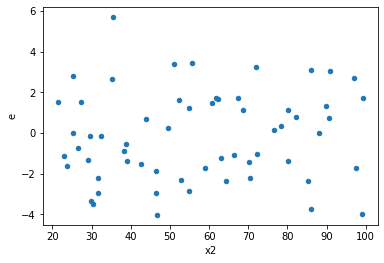

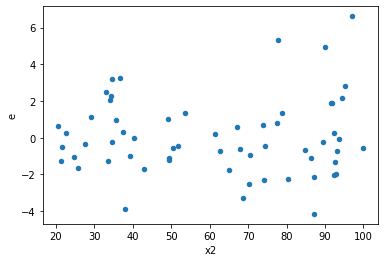

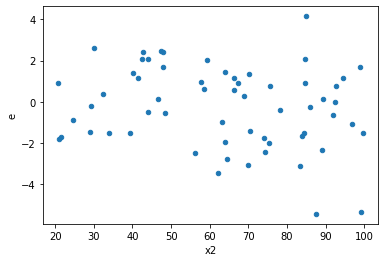

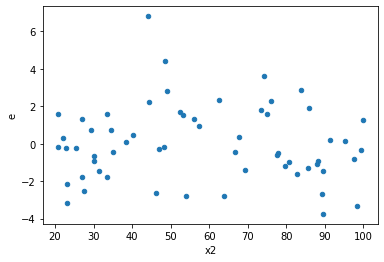

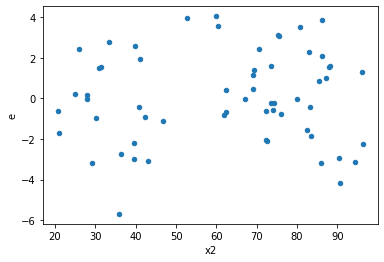

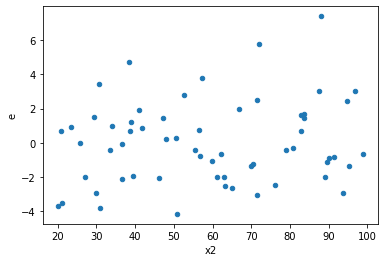

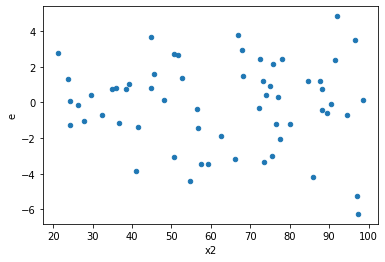

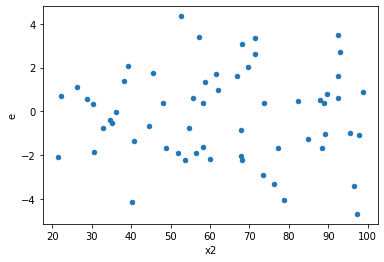

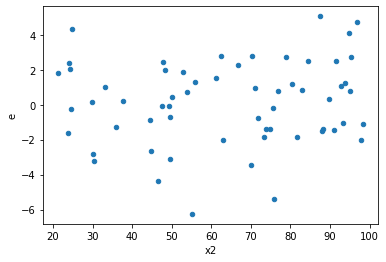

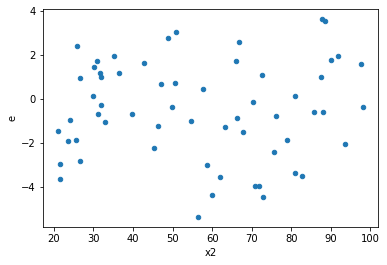

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,20.0,20.0,60.43698903895394,127.1024989143664,3.021849451947697,6.35512494571832,2.1030580929907674,0.10447509694412838,0.9477624515279358,0.05223754847206419,Reject001=1 : Homoscedasticity
2.0,20.0,20.0,35.23439295521355,80.3116966573336,1.7617196477606776,4.01558483286668,2.2793551959137717,0.072664983989978,0.963667508005011,0.036332491994989,Reject001=1 : Homoscedasticity
5.0,20.0,20.0,54.27540583361281,145.3918916444359,2.7137702916806403,7.269594582221795,2.6787803685918194,0.032781777453374294,0.9836091112733129,0.016390888726687147,Reject001=1 : Homoscedasticity
6.0,20.0,20.0,86.96235203955878,163.5966832054819,4.348117601977939,8.179834160274094,1.8812357229144687,0.16627299302620813,0.9168635034868959,0.08313649651310406,Reject001=1 : Homoscedasticity
7.0,20.0,20.0,67.85282985581254,106.23713062926099,3.392641492790627,5.311856531463049,1.5656993356801063,0.324129805120553,0.8379350974397235,0.1620649025602765,Reject001=1 : Homoscedasticity
8.0,20.0,20.0,93.98871435565151,120.47812647141552,4.699435717782576,6.023906323570776,1.281836093805141,0.5839567322943999,0.7080216338528,0.29197836614719996,Reject001=1 : Homoscedasticity
9.0,20.0,20.0,60.95717800894302,72.25253804618659,3.047858900447151,3.612626902309329,1.1852999171908258,0.707526986107005,0.6462365069464975,0.3537634930535025,Reject001=1 : Homoscedasticity
10.0,20.0,20.0,72.20932665629182,110.45077682364919,3.610466332814591,5.52253884118246,1.5295915630037975,0.3497477632001613,0.8251261183999193,0.17487388160008066,Reject001=1 : Homoscedasticity
11.0,20.0,20.0,79.63787245795135,142.10960663600542,3.981893622897567,7.105480331800271,1.7844475530287307,0.20401721153071017,0.8979913942346449,0.10200860576535509,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,20.0,110.07004478031345,85.40547743595174,5.503502239015672,4.2702738717975866,0.7759193485058608,0.5758054286916082,Reject001=1 : Homoscedasticity
1.0,20.0,20.0,60.43698903895394,127.1024989143664,3.021849451947697,6.35512494571832,2.1030580929907674,0.10447509694412838,Reject001=1 : Homoscedasticity
2.0,20.0,20.0,35.23439295521355,80.3116966573336,1.7617196477606776,4.01558483286668,2.2793551959137717,0.072664983989978,Reject001=1 : Homoscedasticity
3.0,20.0,20.0,84.25858302004531,54.56570887813823,4.212929151002266,2.7282854439069117,0.6475982258704366,0.3391794995325501,Reject001=1 : Homoscedasticity
4.0,20.0,20.0,122.9947834656297,93.77947577814916,6.149739173281485,4.688973788907458,0.7624670993006415,0.5498529536822941,Reject001=1 : Homoscedasticity
5.0,20.0,20.0,54.27540583361281,145.3918916444359,2.7137702916806403,7.269594582221795,2.6787803685918194,0.032781777453374294,Reject001=1 : Homoscedasticity
6.0,20.0,20.0,86.96235203955878,163.5966832054819,4.348117601977939,8.179834160274094,1.8812357229144687,0.16627299302620813,Reject001=1 : Homoscedasticity
7.0,20.0,20.0,67.85282985581254,106.23713062926099,3.392641492790627,5.311856531463049,1.5656993356801063,0.324129805120553,Reject001=1 : Homoscedasticity
8.0,20.0,20.0,93.98871435565151,120.47812647141552,4.699435717782576,6.023906323570776,1.281836093805141,0.5839567322943999,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      970
Reject001=0 : Heteroscedasticity     30
Name: Result_test, dtype: int64